# check-R200

In this notebook, we check our estimation of R200 using the HOD model, (Tinker et al. 2011).

In [162]:
import sys
sys.path.append("/home/s1/jesteves/git/ccopa/python")
from main import copacabana
from make_input_files.make_input_datasets import *

In [163]:
import pandas as pd
from astropy.table import Table, vstack, join
from astropy.io.fits import getdata
import numpy as np
import matplotlib.pyplot as plt

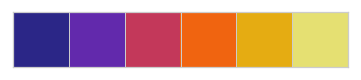

In [164]:
import seaborn as sns; sns.set(color_codes=True)
sns.set_style("whitegrid")
sns.palplot(sns.color_palette("CMRmap"))

In [165]:
## colors
blue = '#2E86C1'
gray = '#A6ACAF'
red = '#A93226'

### Loading Input Catalog

Checking the copa outputs available

In [166]:
master = h5py.File('/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/output/tiles/buzzard_v2.0.0_copa_golden_00001.hdf5','r')
master['clusters/copa/'].keys()

[u'emu-r200-z3',
 u'emu-r200-z3-m1',
 u'emu-r200-zw',
 u'emu-r200-zw-m1',
 u'emu-rhod-z3',
 u'emu-rhod-z3-m1',
 u'emu-rhod-zw',
 u'emu-rhod-zw-m1',
 u'g001-r200',
 u'g001-r200-m1',
 u'g001-rhod',
 u'g001-rhod-m1',
 u'g003-r200',
 u'g003-r200-m1',
 u'g003-rhod',
 u'g003-rhod-m1',
 u'g005-r200',
 u'g005-r200-m1',
 u'g005-rhod',
 u'g005-rhod-m1',
 u'test001-rhod']

In [167]:
master.close()

For instance, we use ``emu-rhod-zw`` which is a run with the BPZ emulator photo-z and the redshift window has a dependecy with redshift. 

In [199]:
title='Buzzard v2.0'

In [200]:
# cfg = '../config_files/config_copa_dc2.yaml'
# copa = copacabana(cfg)

# run   ='emuBPZ-rhod'
# cat   = copa.load_copa_out('cluster',run=run)

In [245]:
cfg = '../config_files/config_buzzard_v2.yaml'
# cfg = '../config_files/config_copa_dc2.yaml'
copa = copacabana(cfg)

# run   ='emu-rhod-zw'
run    ='g001-rhod'
cat   = copa.load_copa_out('cluster',run=run)

mask= np.isnan(cat['Ngals'])
cat = cat[np.logical_not(mask)]

master file: 
 /data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/output/tiles/buzzard_v2.0.0_copa_golden_00001.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/output/tiles/buzzard_v2.0.0_copa_golden_00002.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/output/tiles/buzzard_v2.0.0_copa_golden_00003.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/output/tiles/buzzard_v2.0.0_copa_golden_00004.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/output/tiles/buzzard_v2.0.0_copa_golden_00005.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/output/tiles/buzzard_v2.0.0_copa_golden_00006.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/output/tiles/buzzard_v2.0.0_copa_golden_00007.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/output/tiles/buzzard_v2.0.0_copa_golden_00008.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/output/tiles/buzzard_v2.0.0_copa_golden_00009.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/output/tiles/buzzard_v2.0.0_copa_gol

Since the Buzzard v2.0 was divided in tiles we have an output for each tile.

In [246]:
cat.colnames

['MASKFRAC',
 'R200',
 'CID',
 'M200_true',
 'redshift',
 'Ngals',
 'DA',
 'tile',
 'R200_true',
 'Norm',
 'magLim_i',
 'Nbkg_true',
 'RAPER',
 'Nbkg',
 'DEC',
 'Ngals_true',
 'RA']

In [247]:
zcls  = cat['redshift']
r200  = cat['R200']*0.7
nbkg  = cat['Nbkg']

ngals = cat['Ngals']
norm  = cat['Norm']

nbkgt = cat['Nbkg_true']
ngalst= cat['Ngals_true']

m200  = cat['M200_true']
r200t = cat['R200_true']*0.7

In [248]:
logm  = np.log10(m200)

Checking the sky distribution

In [249]:
sys.path.append("/home/s1/jesteves/git/ccopa/notebooks/")
from myplots import *

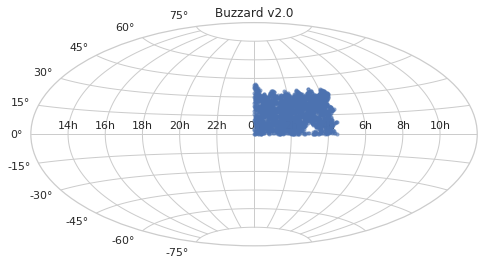

In [250]:
sky_plot(cat['RA'],cat['DEC'],title=title,savefig='sky_plot.png')

The $R_{200}$ distribution for the estimated and true values.

Text(0.5,0,'$R_{200}$ [Mpc/h]')

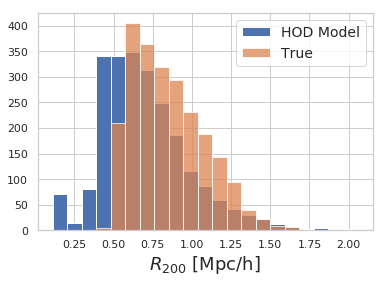

In [251]:
a = plt.hist(r200,bins=21,label='HOD Model')
_ = plt.hist(r200t,bins=a[1],alpha=0.75,label='True')
plt.legend(fontsize=14)
plt.xlabel(r'$R_{200}$ [Mpc/h]',fontsize=18)

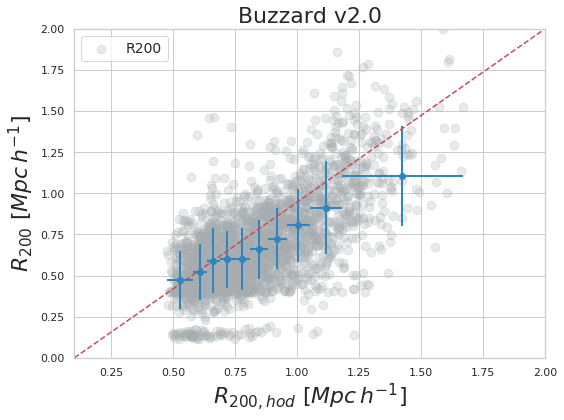

In [265]:
plot_r200_identity(r200,r200t,title=title,xlims=[0.1,2.],ylims=[0.,2.],li='hod')

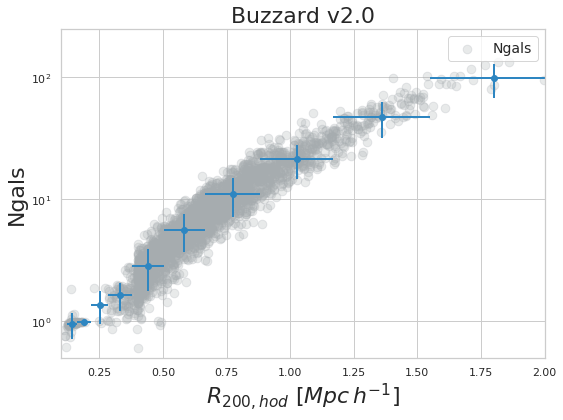

In [254]:
plot_r200_identity(ngals,r200,title=title,ylims=[0.5,250.],xlims=[0.1,2.],ylabel='Ngals',logy=True)
plt.yscale('log')

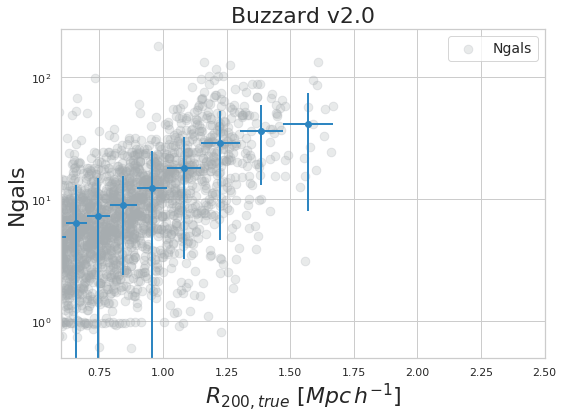

In [255]:
plot_r200_identity(ngals,r200t,title=title,ylims=[0.5,250.],xlims=[0.1+0.5,2.+0.5],ylabel='Ngals',logy=True,li='true')
plt.yscale('log')

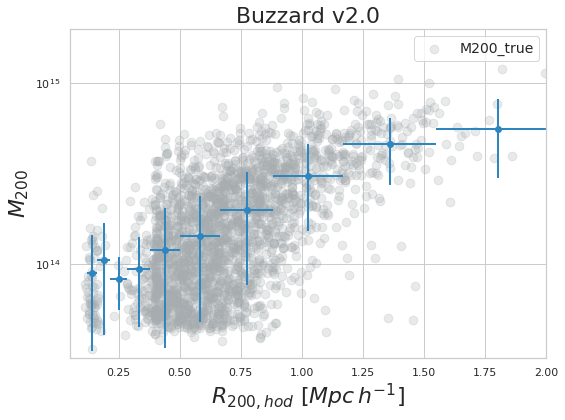

In [256]:
plot_r200_identity(m200,r200,title=title,ylims=[0.3e14,20e14],xlims=[0.05,2.],ylabel=r'$M_{200}$',logy=True)
plt.yscale('log')

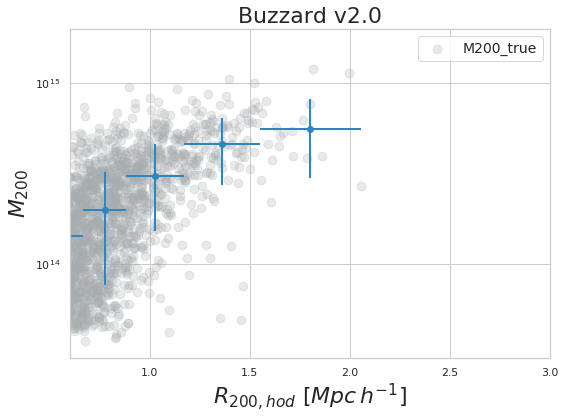

In [257]:
plot_r200_identity(m200,r200,title=title,ylims=[0.3e14,20e14],xlims=[0.1+0.5,2.5+0.5],ylabel=r'$M_{200}$',logy=True)
plt.yscale('log')

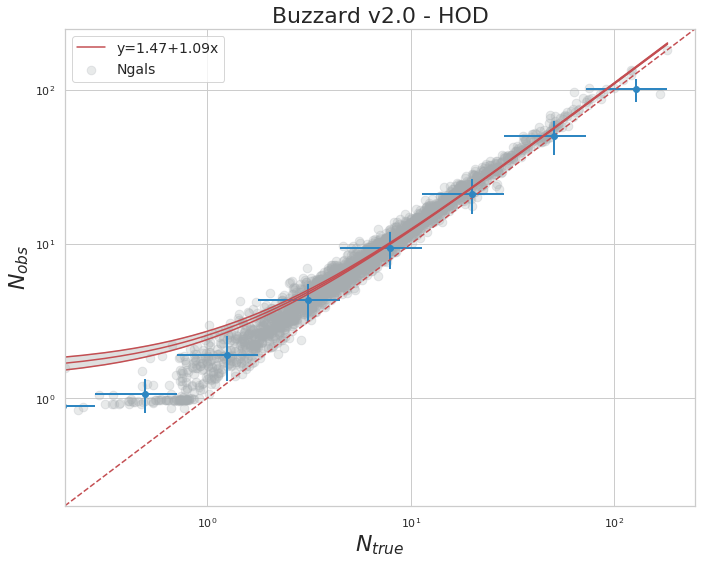

In [258]:
plot_scaling_relation(norm,ngals,title=title+' - HOD',xlims=(0.2,250),fit=True)

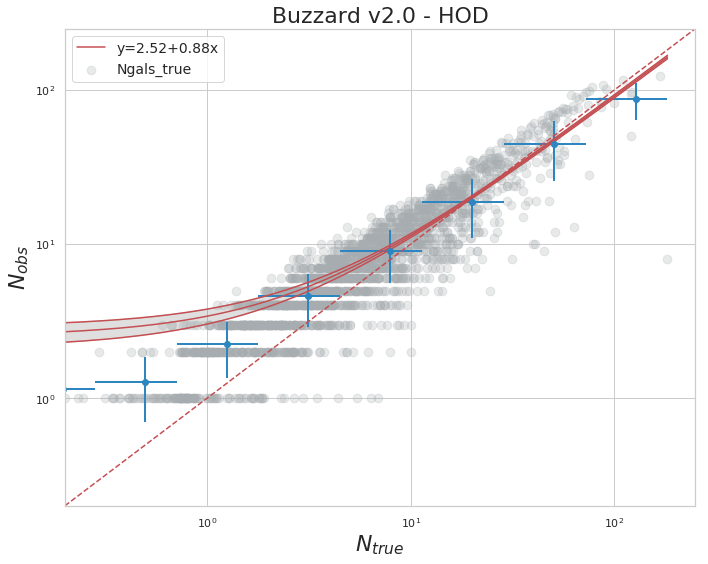

In [259]:
plot_scaling_relation(norm,ngalst,title=title+' - HOD',xlims=(0.2,250),fit=True)

/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


(array([  1.,   0.,   0.,   3.,   2.,   4.,   3.,   1.,   2.,  14.,   8.,
         20.,   8.,  17.,  24.,  31.,  45.,  51.,  53.,  69.,  90., 100.,
        107., 145., 176., 201., 187., 185., 184., 144., 117.,  92.,  86.,
         61.,  30.,  24.,   9.,  12.,   3.,   1.,   1.,   2.,   2.,   1.,
          0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.]),
 array([0.2       , 0.22166667, 0.24333333, 0.265     , 0.28666667,
        0.30833333, 0.33      , 0.35166667, 0.37333333, 0.395     ,
        0.41666667, 0.43833333, 0.46      , 0.48166667, 0.50333333,
        0.525     , 0.54666667, 0.56833333, 0.59      , 0.61166667,
        0.63333333, 0.655     , 0.67666667, 0.69833333, 0.72      ,
        0.74166667, 0.76333333, 0.785     , 0.80666667, 0.82833333,
        0.85      , 0.87166667, 0.89333333, 0.915     , 0.93666667,
        0.95833333, 0.98      , 1.00166667, 1.02333333, 1.045     ,
        1.06666667, 1.08833333, 1.11      , 1.

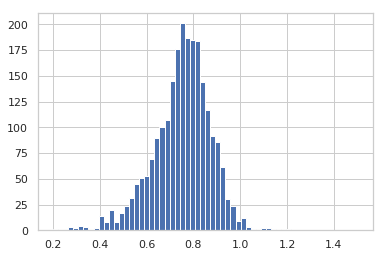

In [260]:
ratio = np.log10(norm/(ngals+0.001))
mask = np.logical_not(np.isnan(ratio))
plt.hist(10**ratio[mask],bins=np.linspace(0.2,1.5,61))

In [261]:
def plot_residual_r200(xvar,r200_hod_mass,r200, ax=None, xlabel='redshift'):
    if ax is None: ax = plt.axes()

    xbins = splitBins(xvar)
    keys, xvarb = makeBins(xvar,xbins)
    xvarb_std = np.diff(xbins)/2

    residual = np.log10(r200_hod_mass/r200)

    residualb = np.array([np.nanmean(residual[idx]) for idx in keys])
    residualb_std = np.array([np.nanstd(residual[idx]) for idx in keys])

    ax.scatter(xvar,residual,color='#A6ACAF',alpha=0.6)
    ax.errorbar(xvarb,residualb,xerr=xvarb_std,yerr=residualb_std,color='#2E86C1',fmt='o')

    ax.set_xlabel(xlabel,fontsize=18)
    # ax.set_ylabel(r'$r_{200}-r_{200,HOD}$ [Mpc $h^{-1}$]',fontsize=18)

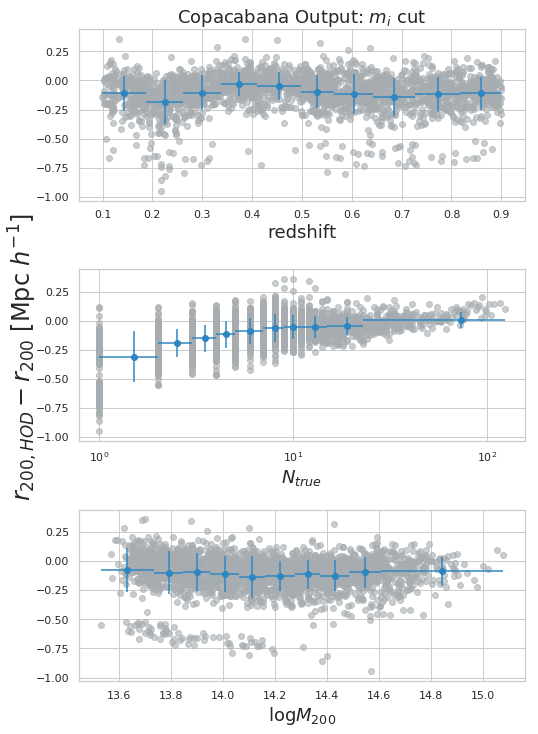

In [262]:
zcls2 = cat['redshift']
r200h2 = cat['R200']
r2002  = cat['R200_true']
m2002  = cat['M200_true']
n1952 = cat['Ngals_true']

fig, ax = plt.subplots(3, 1, sharey='row', figsize=(8,12))
fig.subplots_adjust(hspace=0.4, wspace=0.1)
plot_residual_r200(zcls2,r200h2,r2002,ax=ax[0])
plot_residual_r200(n1952,r200h2,r2002,ax=ax[1],xlabel=r'$N_{true}$')
plot_residual_r200(np.log10(m2002),r200h2,r2002,ax=ax[2],xlabel=r'$\log{M_{200}}$')
# ax[0].set_ylabel(r'$r_{200,HOD}-r_{200}$ [Mpc $h^{-1}$]',fontsize=18)
fig.text(0.03, 0.5, r'$r_{200,HOD}-r_{200}$ [Mpc $h^{-1}$]', ha='center', va='center', rotation='vertical',fontsize=24)
ax[0].set_title('Copacabana Output: $m_{i}$ cut',fontsize=18)
ax[1].set_xscale('log')
plt.savefig('copacabana_r200_residual.png',bb_box='tight')
